<a href="https://colab.research.google.com/github/ninja03jod/Data_Science_Projects/blob/main/CaseStudy_Over_Multiple_DataSets_IMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/covid_19_clean_complete.csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
df.drop(columns=['Province/State'],inplace=True)

In [ ]:
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.sample(5)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48328,Canada,52.93990,-73.549100,2020-07-25,58414,5666,0,52748,Americas
26122,Belarus,53.70980,27.953400,2020-05-01,14917,93,2918,11906,Europe
21363,Uruguay,-32.52280,-55.765800,2020-04-12,480,7,231,242,Americas
7232,Russia,61.52401,105.318756,2020-02-18,2,0,2,0,Europe
8005,Pakistan,30.37530,69.345100,2020-02-21,0,0,0,0,Eastern Mediterranean


In [ ]:
df.rename(columns={"WHO Region":"WHO_Region","Country/Region":"Country"},inplace=True)

In [ ]:
df.corr()['Confirmed']

<ipython-input-9-eba7225174f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Confirmed']


Lat          0.036665
Long        -0.078911
Confirmed    1.000000
Deaths       0.912361
Recovered    0.895506
Active       0.950255
Name: Confirmed, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.WHO_Region.value_counts()

Europe                   15040
Western Pacific          10340
Africa                    9024
Americas                  8648
Eastern Mediterranean     4136
South-East Asia           1880
Name: WHO_Region, dtype: int64

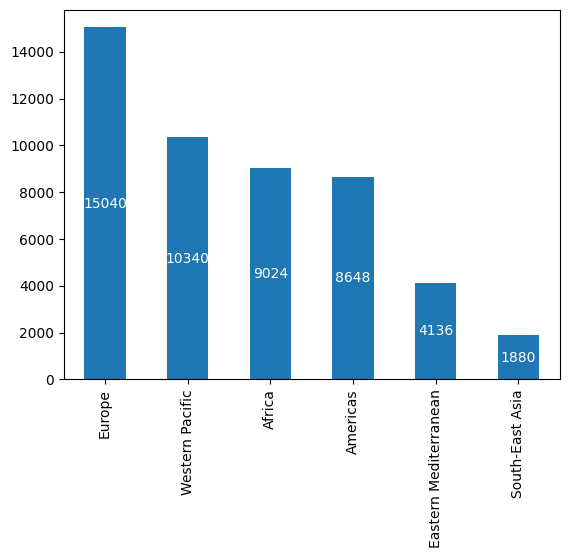

In [ ]:
bar = df.WHO_Region.value_counts().plot.bar()
plt.bar_label(bar.containers[0],label_type="center",color="white");

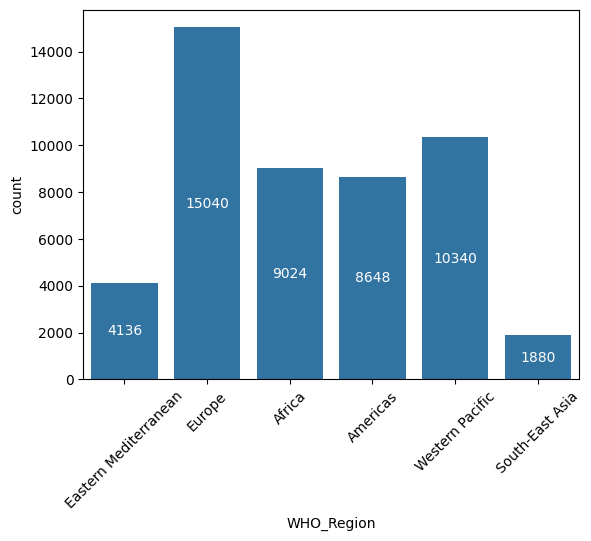

In [ ]:
bar = sns.countplot(data=df,x='WHO_Region')
plt.xticks(rotation=45)
plt.savefig("HD.png",dpi=600)
plt.bar_label(bar.containers[0],label_type="center",color="white");

In [ ]:
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO_Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


Text(0.5, 1.0, 'Average of death,active, confirmed and recovered people')

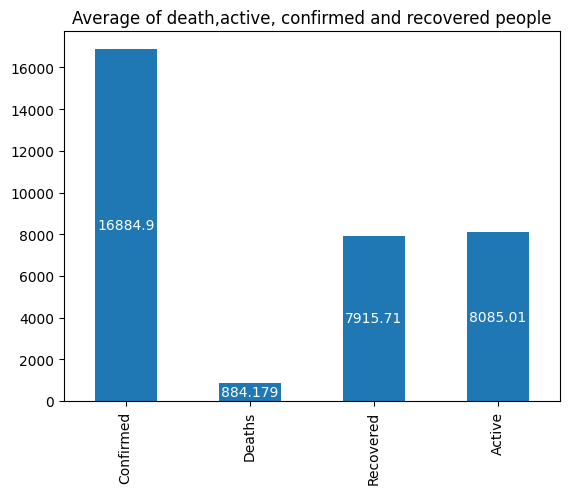

In [ ]:
# Average of death,active, confirmed and recovered people
bar = df[["Confirmed","Deaths","Recovered","Active"]].mean().plot.bar()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Average of death,active, confirmed and recovered people")

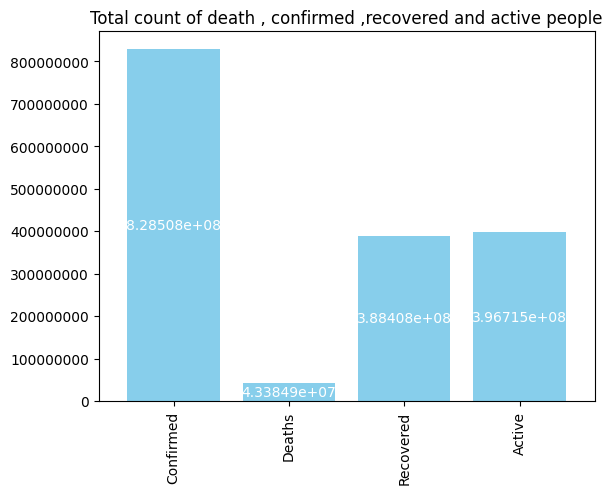

In [48]:
# Total count of death , confirmed ,recovered and active people
bar = df[["Confirmed","Deaths","Recovered","Active"]].sum().plot.bar(width=0.8,color='skyblue')
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Total count of death , confirmed ,recovered and active people")
bar.get_yaxis().get_major_formatter().set_scientific(False)

<Axes: ylabel='WHO_Region'>

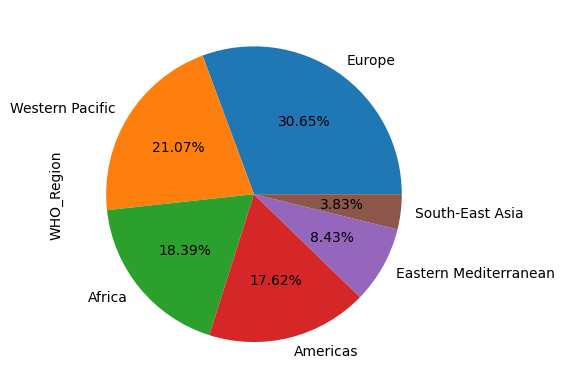

In [49]:
df.WHO_Region.value_counts().plot.pie(autopct="%.2f%%")

In [51]:
new = df.select_dtypes(include=[int,float])

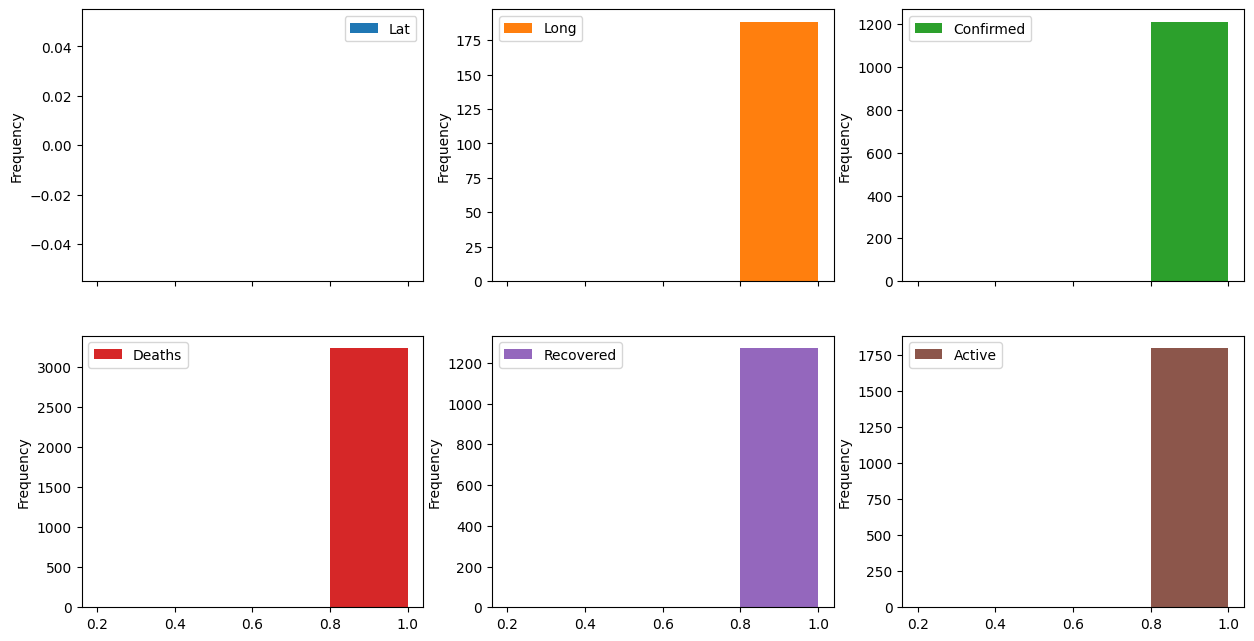

In [57]:
new.plot.hist(subplots=True,layout=(3,3),figsize=(15,12),bins=[0.2,0.4,0.6,0.8,1]);

In [67]:
def hist_box_plot(data,col,bins):
  fig,axs = plt.subplots(ncols=2,figsize=(11,3))

  sns.histplot(data=data,x=col,bins=bins,ax=axs[0])
  sns.boxplot(data=data,x=col,ax=axs[1])

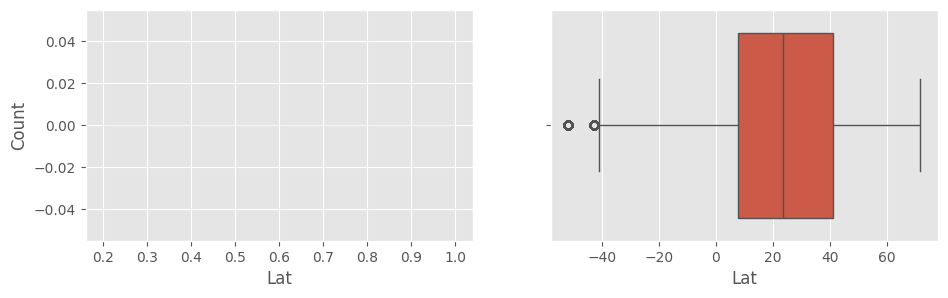

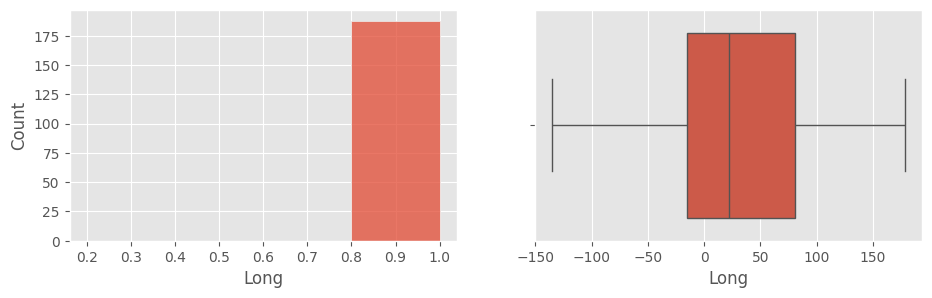

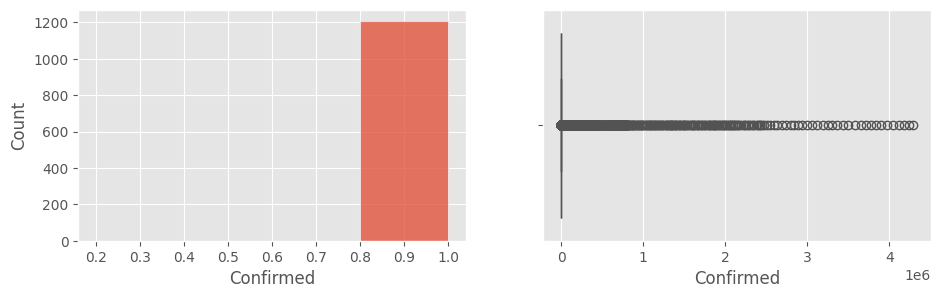

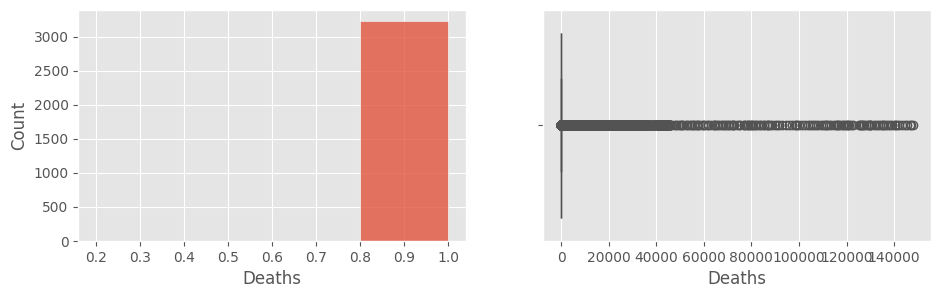

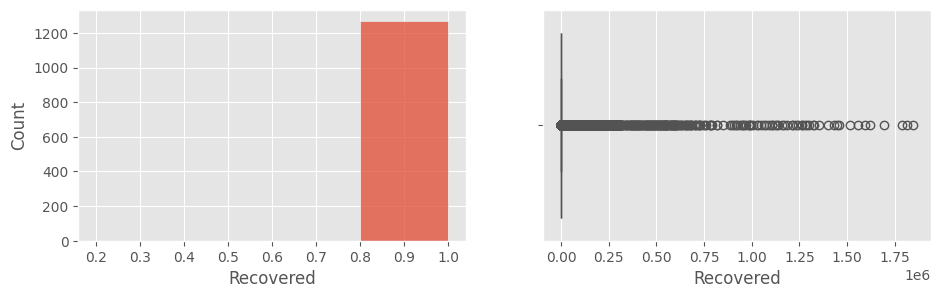

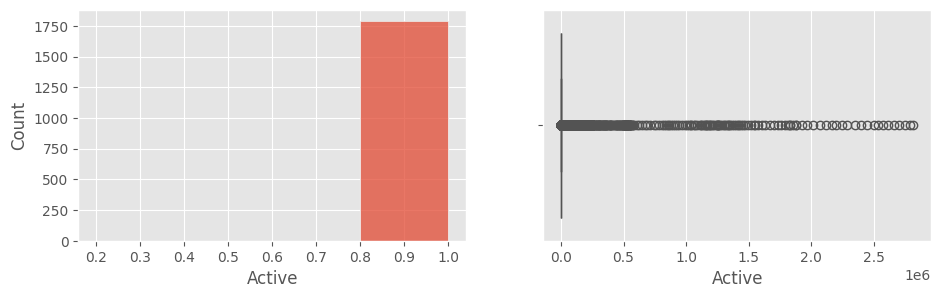

In [68]:
plt.style.use("ggplot")
for col in new.columns:
  hist_box_plot(new,col,[0.2,0.4,0.6,0.8,1])

(array([4.8802e+04, 1.1000e+02, 3.9000e+01, 3.7000e+01, 3.2000e+01,
        1.9000e+01, 9.0000e+00, 7.0000e+00, 6.0000e+00, 7.0000e+00]),
 array([      0. ,  429025.9,  858051.8, 1287077.7, 1716103.6, 2145129.5,
        2574155.4, 3003181.3, 3432207.2, 3861233.1, 4290259. ]),
 <BarContainer object of 10 artists>)

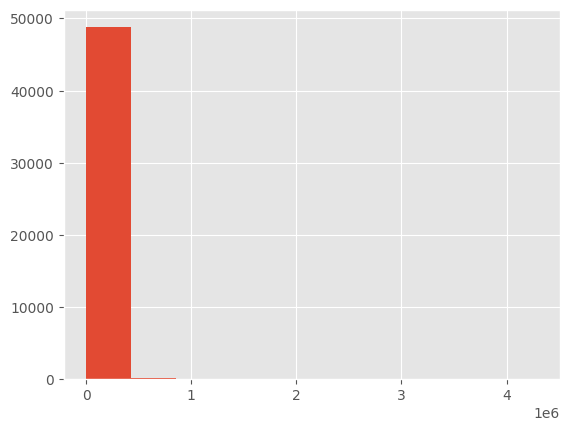

In [64]:
# for one column
plt.hist(df['Confirmed'])

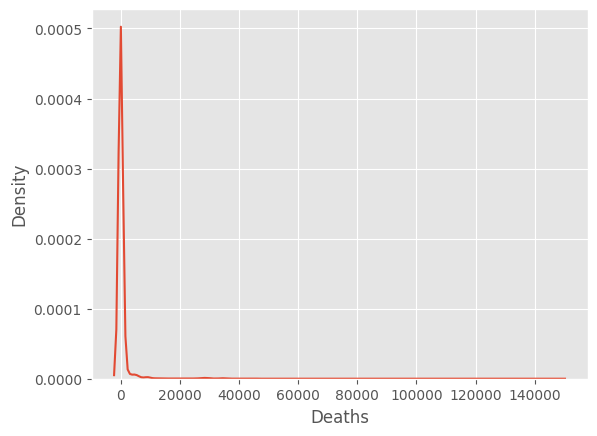

In [71]:
sns.kdeplot(df['Deaths']);

In [1]:
import pandas as pd
import requests

In [3]:
response = requests.get("https://api.themoviedb.org/3/movie/upcoming?api_key=17f80ce06535a2aee0acef962096d7ef")
response

<Response [200]>

In [5]:
response.json()

{'dates': {'maximum': '2024-02-21', 'minimum': '2024-01-31'},
 'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/r1eCvALF6fN7anVYL8Zn7PaceD1.jpg',
   'genre_ids': [35, 10751, 14],
   'id': 787699,
   'original_language': 'en',
   'original_title': 'Wonka',
   'overview': 'Willy Wonka – chock-full of ideas and determined to change the world one delectable bite at a time – is proof that the best things in life begin with a dream, and if you’re lucky enough to meet Willy Wonka, anything is possible.',
   'popularity': 3413.306,
   'poster_path': '/qhb1qOilapbapxWQn9jtRCMwXJF.jpg',
   'release_date': '2023-12-06',
   'title': 'Wonka',
   'video': False,
   'vote_average': 7.2,
   'vote_count': 1561},
  {'adult': False,
   'backdrop_path': '/meyhnvssZOPPjud4F1CjOb4snET.jpg',
   'genre_ids': [16, 12, 35, 10751, 28],
   'id': 940551,
   'original_language': 'en',
   'original_title': 'Migration',
   'overview': 'After a migrating duck family alights on their pond with thrilling t

In [12]:
# we have main point is results:
new = response.json()['results']
new

[{'adult': False,
  'backdrop_path': '/r1eCvALF6fN7anVYL8Zn7PaceD1.jpg',
  'genre_ids': [35, 10751, 14],
  'id': 787699,
  'original_language': 'en',
  'original_title': 'Wonka',
  'overview': 'Willy Wonka – chock-full of ideas and determined to change the world one delectable bite at a time – is proof that the best things in life begin with a dream, and if you’re lucky enough to meet Willy Wonka, anything is possible.',
  'popularity': 3413.306,
  'poster_path': '/qhb1qOilapbapxWQn9jtRCMwXJF.jpg',
  'release_date': '2023-12-06',
  'title': 'Wonka',
  'video': False,
  'vote_average': 7.2,
  'vote_count': 1561},
 {'adult': False,
  'backdrop_path': '/meyhnvssZOPPjud4F1CjOb4snET.jpg',
  'genre_ids': [16, 12, 35, 10751, 28],
  'id': 940551,
  'original_language': 'en',
  'original_title': 'Migration',
  'overview': 'After a migrating duck family alights on their pond with thrilling tales of far-flung places, the Mallard family embarks on a family road trip, from New England, to New York 

In [9]:
feat = pd.DataFrame(response.json()['results'])
feat

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/r1eCvALF6fN7anVYL8Zn7PaceD1.jpg,"[35, 10751, 14]",787699,en,Wonka,Willy Wonka – chock-full of ideas and determin...,3413.306,/qhb1qOilapbapxWQn9jtRCMwXJF.jpg,2023-12-06,Wonka,False,7.200,1561
1,False,/meyhnvssZOPPjud4F1CjOb4snET.jpg,"[16, 12, 35, 10751, 28]",940551,en,Migration,After a migrating duck family alights on their...,2391.227,/ldfCF9RhR40mppkzmftxapaHeTo.jpg,2023-12-06,Migration,False,7.741,309
2,False,/bQS43HSLZzMjZkcHJz4fGc7fNdz.jpg,"[878, 10749, 35]",792307,en,Poor Things,Brought back to life by an unorthodox scientis...,690.010,/kCGlIMHnOm8JPXq3rXM6c5wMxcT.jpg,2023-12-07,Poor Things,False,8.200,495
3,False,/p9DKeXp6FPJtAQ1k13Z4zPWrCbN.jpg,[18],1058694,en,Radical,"In a Mexican border town plagued by neglect, c...",592.568,/eSatbygYZp8ooprBHZdb6GFZxGB.jpg,2023-10-19,Radical,False,8.460,101
4,False,/a0GM57AnJtNi7lMOCamniiyV10W.jpg,"[16, 12, 14]",508883,ja,君たちはどう生きるか,"While the Second World War rages, the teenage ...",644.374,/jDQPkgzerGophKRRn7MKm071vCU.jpg,2023-07-14,The Boy and the Heron,False,7.400,841
5,False,/9uNCYl2qmg16FLarg3n3Ea0PBIG.jpg,"[27, 53]",1216784,en,Sunrise,When an ex-cop named Fallon returns to the sce...,581.373,/4aRvg2ybz646gciX5M6qaclunC2.jpg,2024-01-19,Sunrise,False,5.300,4
6,False,/kWyQh9fCrgcMfhqZmqtp89Q0TrT.jpg,"[35, 10749]",1072790,en,Anyone But You,"After an amazing first date, Bea and Ben’s fie...",522.938,/yRt7MGBElkLQOYRvLTT1b3B1rcp.jpg,2023-12-21,Anyone But You,False,7.200,133
7,False,/4MCKNAc6AbWjEsM2h9Xc29owo4z.jpg,"[28, 53, 18]",866398,en,The Beekeeper,One man’s campaign for vengeance takes on nati...,514.114,/A7EByudX0eOzlkQ2FIbogzyazm2.jpg,2024-01-10,The Beekeeper,False,7.500,199
8,False,/klb3yODwKMRle19EcvdeSatEZL7.jpg,"[27, 53]",1072342,en,Night Swim,Forced into early retirement by a degenerative...,353.316,/gSkfBGdxdialBMM7P02V4hcI6Ij.jpg,2024-01-03,Night Swim,False,5.900,138
9,False,/7NRGAtu8E4343NSKwhkgmVRDINw.jpg,"[27, 9648]",507089,en,Five Nights at Freddy's,"Recently fired and desperate for work, a troub...",350.437,/7BpNtNfxuocYEVREzVMO75hso1l.jpg,2023-10-25,Five Nights at Freddy's,False,7.720,3265


In [14]:
pd.DataFrame(response.json()['results'])[['id','title','original_language','overview','popularity','release_date','vote_average','vote_count']]

,id,title,original_language,overview,popularity,release_date,vote_average,vote_count
0,787699,Wonka,en,Willy Wonka – chock-full of ideas and determin...,3413.306,2023-12-06,7.200,1561
1,940551,Migration,en,After a migrating duck family alights on their...,2391.227,2023-12-06,7.741,309
2,792307,Poor Things,en,Brought back to life by an unorthodox scientis...,690.010,2023-12-07,8.200,495
3,1058694,Radical,en,"In a Mexican border town plagued by neglect, c...",592.568,2023-10-19,8.460,101
4,508883,The Boy and the Heron,ja,"While the Second World War rages, the teenage ...",644.374,2023-07-14,7.400,841
5,1216784,Sunrise,en,When an ex-cop named Fallon returns to the sce...,581.373,2024-01-19,5.300,4
6,1072790,Anyone But You,en,"After an amazing first date, Bea and Ben’s fie...",522.938,2023-12-21,7.200,133
7,866398,The Beekeeper,en,One man’s campaign for vengeance takes on nati...,514.114,2024-01-10,7.500,199
8,1072342,Night Swim,en,Forced into early retirement by a degenerative...,353.316,2024-01-03,5.900,138
9,507089,Five Nights at Freddy's,en,"Recently fired and desperate for work, a troub...",350.437,2023-10-25,7.720,3265


In [10]:
df = feat[['id','title','original_language','overview','popularity','release_date','vote_average','vote_count']]
df

,id,title,original_language,overview,popularity,release_date,vote_average,vote_count
0,787699,Wonka,en,Willy Wonka – chock-full of ideas and determin...,3413.306,2023-12-06,7.200,1561
1,940551,Migration,en,After a migrating duck family alights on their...,2391.227,2023-12-06,7.741,309
2,792307,Poor Things,en,Brought back to life by an unorthodox scientis...,690.010,2023-12-07,8.200,495
3,1058694,Radical,en,"In a Mexican border town plagued by neglect, c...",592.568,2023-10-19,8.460,101
4,508883,The Boy and the Heron,ja,"While the Second World War rages, the teenage ...",644.374,2023-07-14,7.400,841
5,1216784,Sunrise,en,When an ex-cop named Fallon returns to the sce...,581.373,2024-01-19,5.300,4
6,1072790,Anyone But You,en,"After an amazing first date, Bea and Ben’s fie...",522.938,2023-12-21,7.200,133
7,866398,The Beekeeper,en,One man’s campaign for vengeance takes on nati...,514.114,2024-01-10,7.500,199
8,1072342,Night Swim,en,Forced into early retirement by a degenerative...,353.316,2024-01-03,5.900,138
9,507089,Five Nights at Freddy's,en,"Recently fired and desperate for work, a troub...",350.437,2023-10-25,7.720,3265


In [11]:
# total we have 39 pages with 700 records
upc_df = pd.DataFrame()
upc_df

""


In [15]:
for i in range(1,40):
  response = requests.get("https://api.themoviedb.org/3/movie/upcoming?api_key=17f80ce06535a2aee0acef962096d7ef&language=en-US&page={}".format(i))
  ndf = pd.DataFrame(response.json()['results'])[['id','title','original_language','overview','popularity','release_date','vote_average','vote_count']]
  upc_df = upc_df.append(ndf)

<ipython-input-15-79a88c453223>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  upc_df = upc_df.append(ndf)
<ipython-input-15-79a88c453223>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  upc_df = upc_df.append(ndf)
<ipython-input-15-79a88c453223>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  upc_df = upc_df.append(ndf)
<ipython-input-15-79a88c453223>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  upc_df = upc_df.append(ndf)
<ipython-input-15-79a88c453223>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  upc_df = upc_df.append(ndf)
<ipython-i

In [16]:
upc_df

,id,title,original_language,overview,popularity,release_date,vote_average,vote_count
0,787699,Wonka,en,Willy Wonka – chock-full of ideas and determin...,3413.306,2023-12-06,7.200,1561
1,940551,Migration,en,After a migrating duck family alights on their...,2391.227,2023-12-06,7.741,309
2,792307,Poor Things,en,Brought back to life by an unorthodox scientis...,690.010,2023-12-07,8.200,495
3,1058694,Radical,en,"In a Mexican border town plagued by neglect, c...",592.568,2023-10-19,8.460,101
4,508883,The Boy and the Heron,ja,"While the Second World War rages, the teenage ...",644.374,2023-07-14,7.400,841
...,...,...,...,...,...,...,...,...
15,1237289,Just One Pint,en,"Haley, a 23-year-old girl, uses alcohol to dea...",1.352,2024-02-16,0.000,0
16,1237223,Irrelevancia,es,,1.400,2024-02-15,0.000,0
17,1237194,Half of Me,en,"A young gay, neurotic and ex-religious art stu...",1.400,2024-02-01,0.000,0
18,1237110,Wasabi: Not a Fairy Tale,ja,"Kano, a victim of bullying her entire life due...",1.400,2024-02-09,0.000,0


In [17]:
upc_df.shape

(780, 8)

In [18]:
import seaborn as sns

In [24]:
# how to get seaborn dataset

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [26]:
new = sns.load_dataset("iris")
df = pd.DataFrame(new)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
d = sns.load_dataset("tips")
tips = pd.DataFrame(d)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

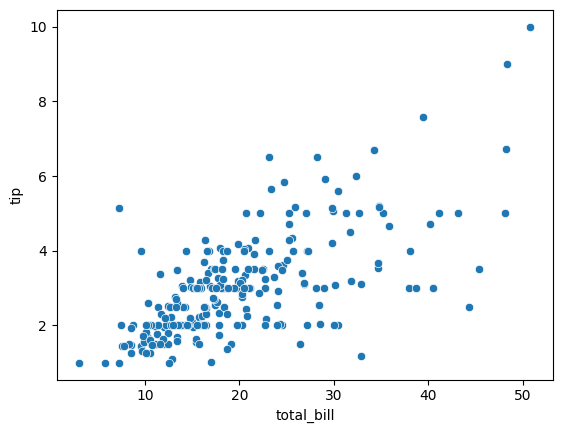

In [28]:
sns.scatterplot(data=tips,x="total_bill",y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

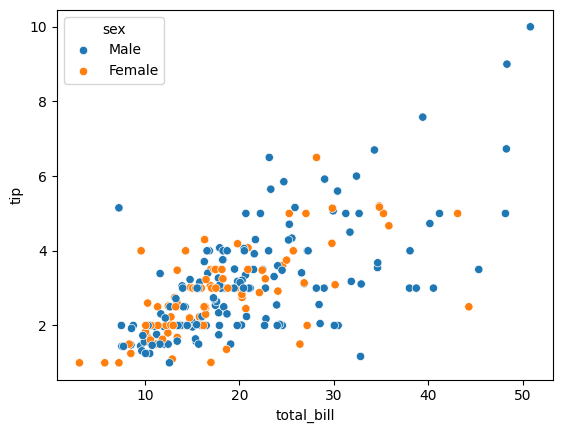

In [29]:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="sex")

<Axes: xlabel='total_bill', ylabel='tip'>

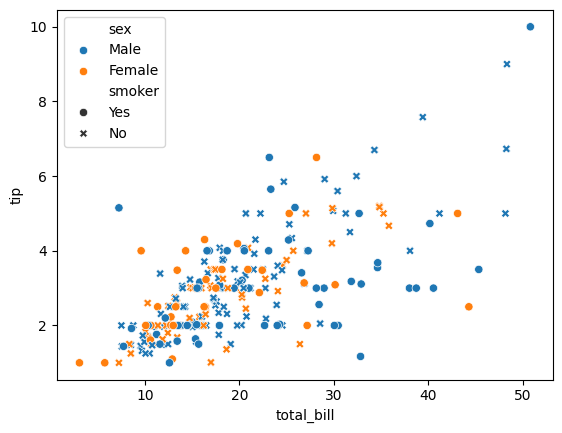

In [30]:
# if we wants smoker with male and female then use style:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="sex",style="smoker")

<Axes: xlabel='total_bill', ylabel='tip'>

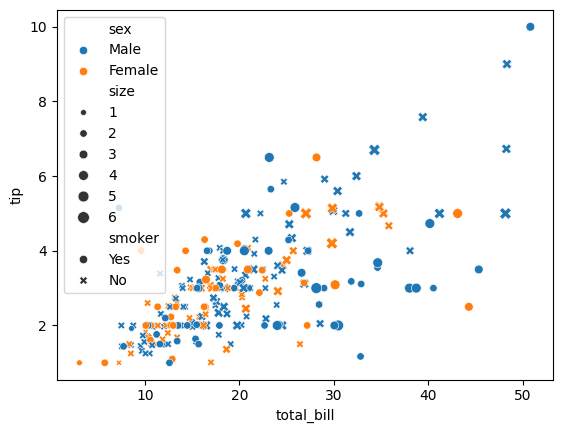

In [32]:
# in this dataset we have size column which represents the how many peoples comes in restaurent:
# we can add this also;
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="sex",style="smoker",size="size")

<Axes: xlabel='total_bill', ylabel='tip'>

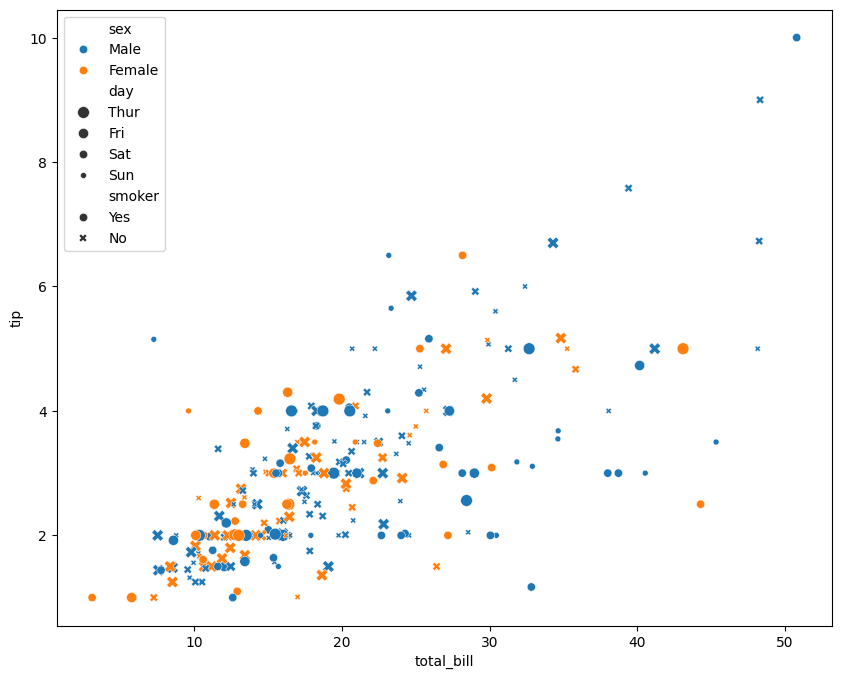

In [35]:
# if we wants on which day they comes to it:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="sex",style="smoker",size="day")

In [37]:
t = sns.load_dataset("titanic")
titanic = pd.DataFrame(t)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='sex', ylabel='fare'>

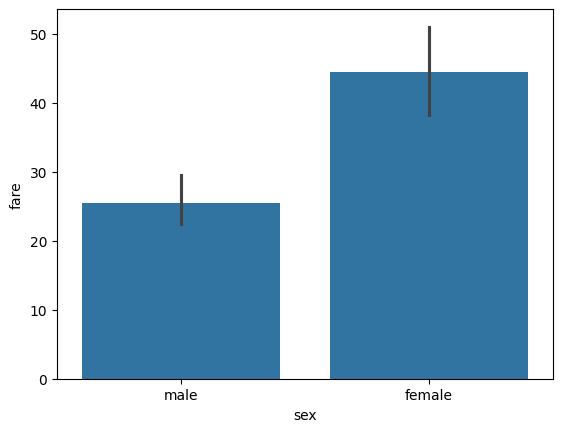

In [40]:
sns.barplot(data=titanic,x="sex",y="fare")

<Axes: xlabel='pclass', ylabel='age'>

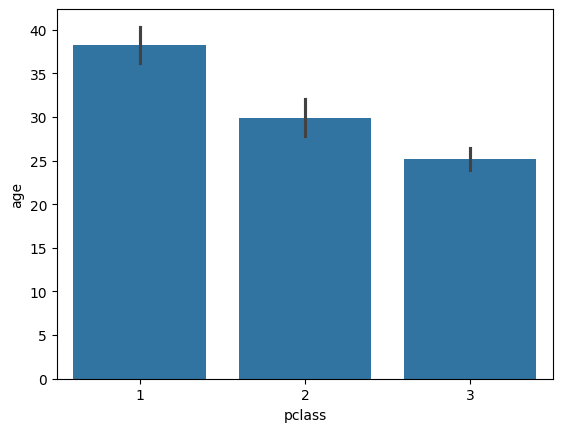

In [42]:
sns.barplot(data=titanic,x="pclass",y="age")

<Axes: xlabel='pclass', ylabel='fare'>

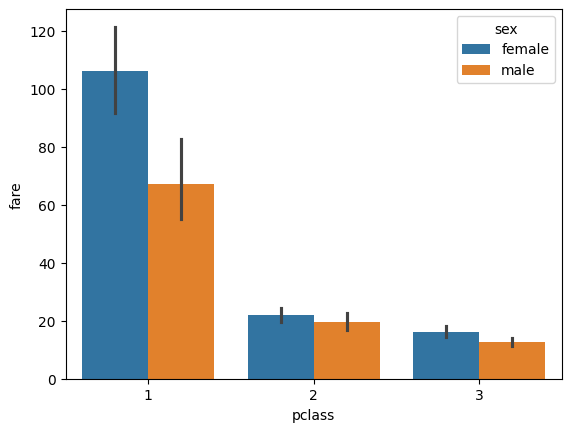

In [47]:
sns.barplot(data=titanic,x="pclass",y="fare",hue='sex')

In [48]:
titanic[:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


<Axes: ylabel='age'>

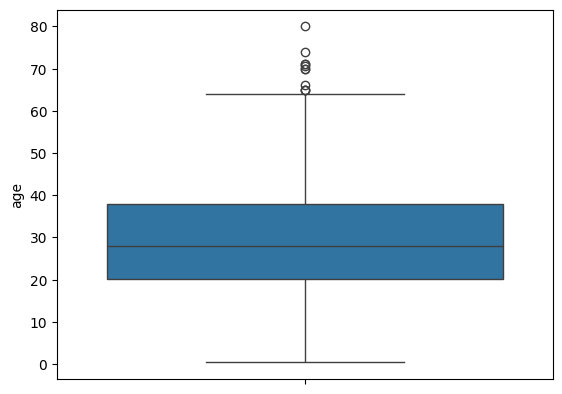

In [119]:
sns.boxplot(titanic['age'])

<Axes: xlabel='sex', ylabel='age'>

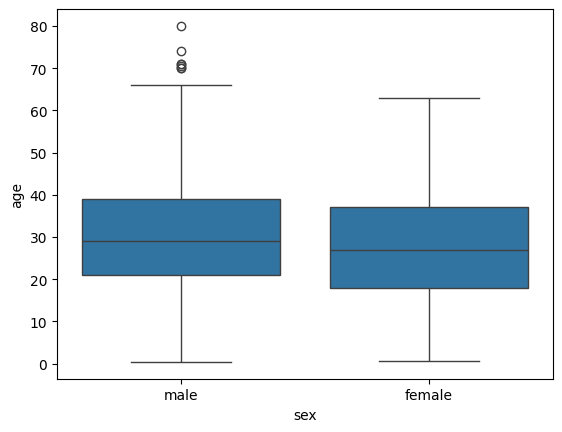

In [49]:
sns.boxplot(data=titanic,x="sex",y="age")

<Axes: xlabel='pclass', ylabel='fare'>

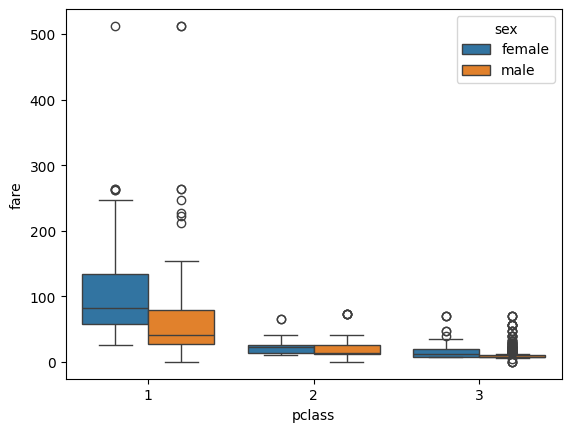

In [54]:
sns.boxplot(data=titanic,x="pclass",y="fare",hue="sex")

In [59]:
titanic.survived == 0 # this will gives me bool output wherever 0 --> false 1--> True

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: survived, Length: 891, dtype: bool

In [60]:
# if i want whole record then put it into sq. bracket
titanic[titanic.survived == 0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [61]:
# if we wants only age of those peoples who are not survied then
titanic[titanic.survived == 0][['age']]

,age
0,22.0
4,35.0
5,NaN
6,54.0
7,2.0
...,...
884,25.0
885,39.0
886,27.0
888,NaN


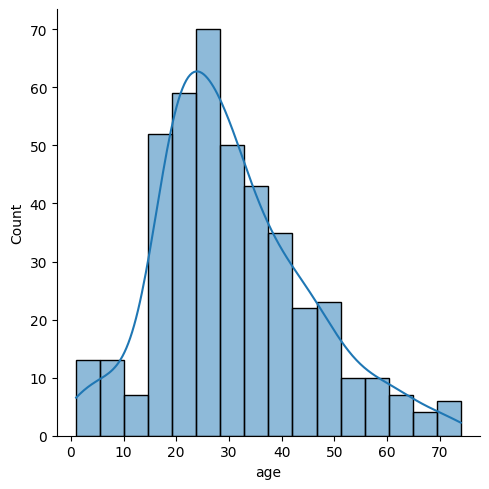

In [63]:
# lets plot the survived peoples and the people who wont survive wrt to age
sns.displot(titanic[titanic['survived']==0]['age'],kde=True)
# Those peoples with age who are not survived

<Axes: xlabel='age', ylabel='Count'>

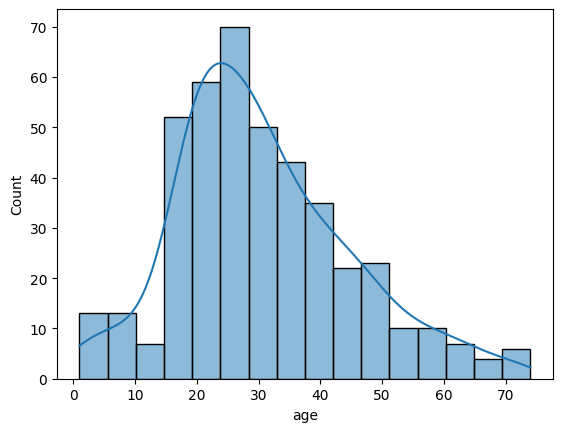

In [65]:
sns.histplot(titanic[titanic.survived == 0]['age'],kde=True)

<Axes: xlabel='age', ylabel='Count'>

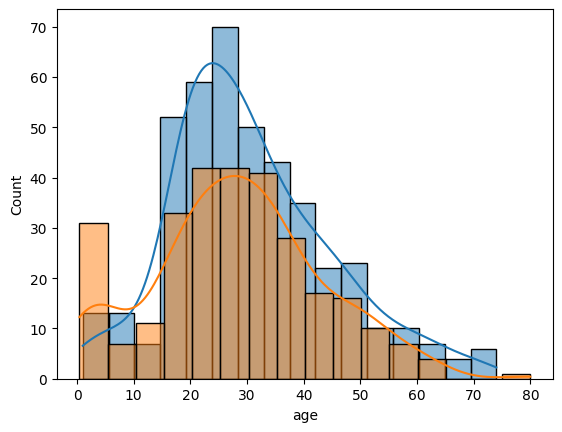

In [66]:
# if we wants the plot for those peoples who are survied and not:
sns.histplot(titanic[titanic.survived == 0]['age'],kde=True) # not survied color --> blue
sns.histplot(titanic[titanic.survived == 1]['age'],kde=True) # survived color --> orange

<ipython-input-69-441de678b67b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.survived == 0]['age'],kde=True)
<ipython-input-69-441de678b67b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.survived == 1]['age'],kde=True)


<Axes: xlabel='age', ylabel='Density'>

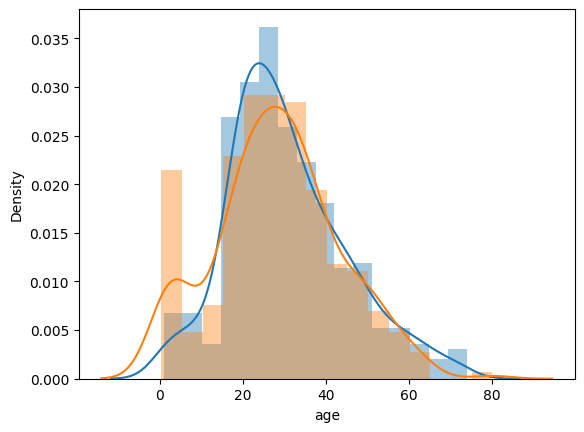

In [69]:
sns.distplot(titanic[titanic.survived == 0]['age'],kde=True)
sns.distplot(titanic[titanic.survived == 1]['age'],kde=True)

<Axes: xlabel='age', ylabel='Density'>

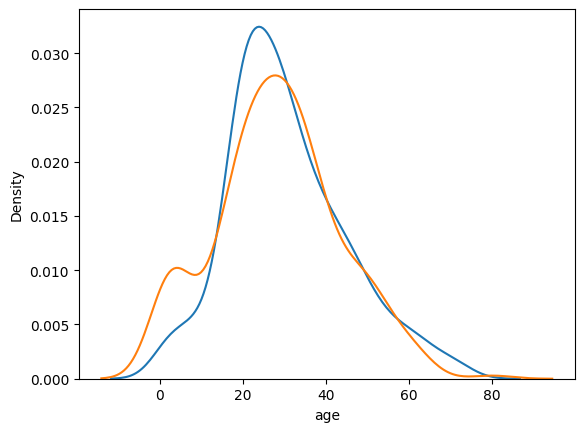

In [77]:
sns.kdeplot(titanic[titanic['survived']==0]['age'])
sns.kdeplot(titanic[titanic['survived']==1]['age'])

In [78]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [120]:
# if i want according to class how many man or woman survived or not:
titanic.groupby(['class','who'])[['survived']].value_counts()

class   who    survived
First   child  1             5
               0             1
        man    0            77
               1            42
        woman  1            89
               0             2
Second  child  1            19
               0             0
        man    0            91
               1             8
        woman  1            60
               0             6
Third   child  0            33
               1            25
        man    0           281
               1            38
        woman  0            58
               1            56
dtype: int64

In [121]:
pd.crosstab(titanic['survived'],titanic['sex'])
# crosstab gives categorical count like value_counts()

sex,female,male
survived,,
0,81,468
1,233,109


<Axes: xlabel='sex', ylabel='survived'>

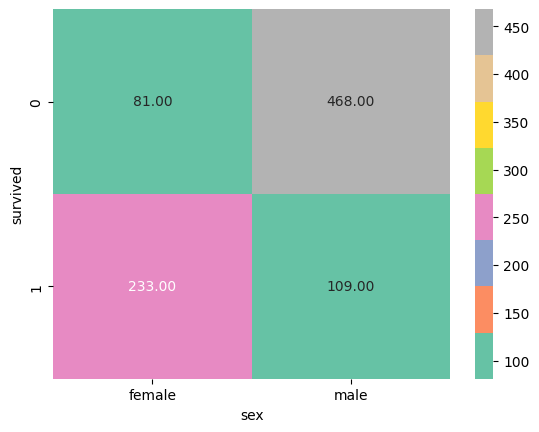

In [124]:
sns.heatmap(pd.crosstab(titanic['survived'],titanic['sex']),annot=True,fmt=".2f",cmap="Set2")

In [91]:
pd.crosstab(titanic['survived'],titanic['pclass'])

pclass,1,2,3
survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='survived', ylabel='pclass'>

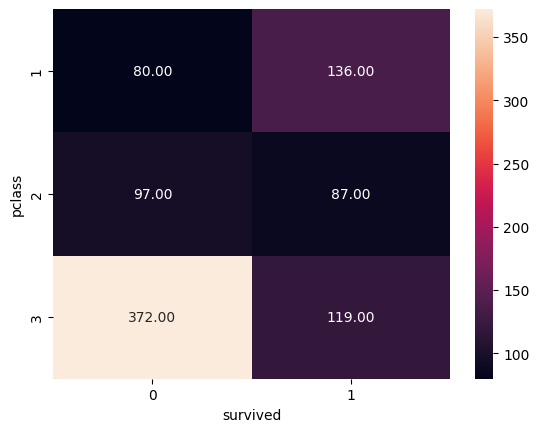

In [95]:
sns.heatmap(pd.crosstab(titanic['pclass'],titanic['survived']),annot=True,fmt=".2f")

In [97]:
# if i wants the percentage of survived man or woman:
titanic.groupby("survived")['who'].value_counts(normalize=True)*100

survived  who  
0         man      81.785064
          woman    12.021858
          child     6.193078
1         woman    59.941520
          man      25.730994
          child    14.327485
Name: who, dtype: float64

In [128]:
titanic.groupby("survived")['who'].value_counts()

survived  who  
0         man      449
          woman     66
          child     34
1         woman    205
          man       88
          child     49
Name: who, dtype: int64

In [127]:
pd.crosstab(titanic['survived'],titanic['who'])

who,child,man,woman
survived,,,
0,34,449,66
1,49,88,205


In [131]:
pd.crosstab(titanic['survived'],titanic['who'],normalize=True)*100

who,child,man,woman
survived,,,
0,3.815937,50.392817,7.407407
1,5.499439,9.876543,23.007856


In [108]:
(titanic.groupby(["embarked","survived"])['sex'].value_counts(normalize=True)*100)

embarked  survived  sex   
C         0         male      88.000000
                    female    12.000000
          1         female    68.817204
                    male      31.182796
Q         0         male      80.851064
                    female    19.148936
          1         female    90.000000
                    male      10.000000
S         0         male      85.245902
                    female    14.754098
          1         female    64.516129
                    male      35.483871
Name: sex, dtype: float64

<Axes: xlabel='embarked,survived'>

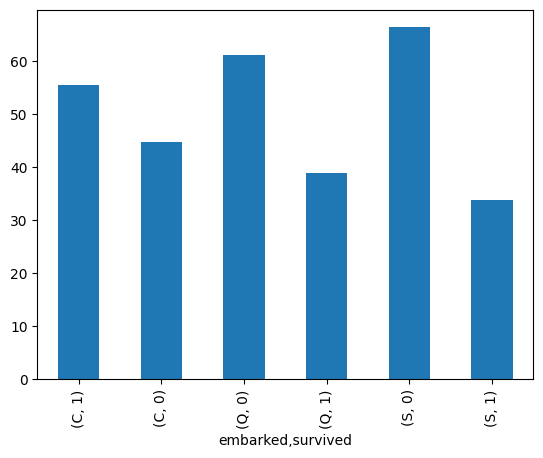

In [104]:
(titanic.groupby("embarked")['survived'].value_counts(normalize=True)*100).plot(kind="bar")

In [109]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [134]:
titanic.groupby(["embark_town","sex"])[["alive"]].value_counts()

embark_town  sex     alive
Cherbourg    female  yes       64
                     no         9
             male    no        66
                     yes       29
Queenstown   female  yes       27
                     no         9
             male    no        38
                     yes        3
Southampton  female  yes      140
                     no        63
             male    no       364
                     yes       77
dtype: int64

<Axes: xlabel='alive', ylabel='sex'>

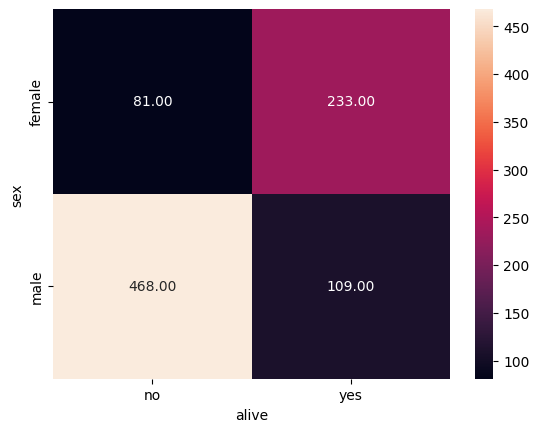

In [118]:
sns.heatmap(pd.crosstab(titanic["sex"],titanic["alive"]),annot=True,fmt=".2f")

In [136]:
# i want to fetch how many are sibling spouse survived:
pd.crosstab(titanic['survived'],titanic['sibsp'])

sibsp,0,1,2,3,4,5,8
survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


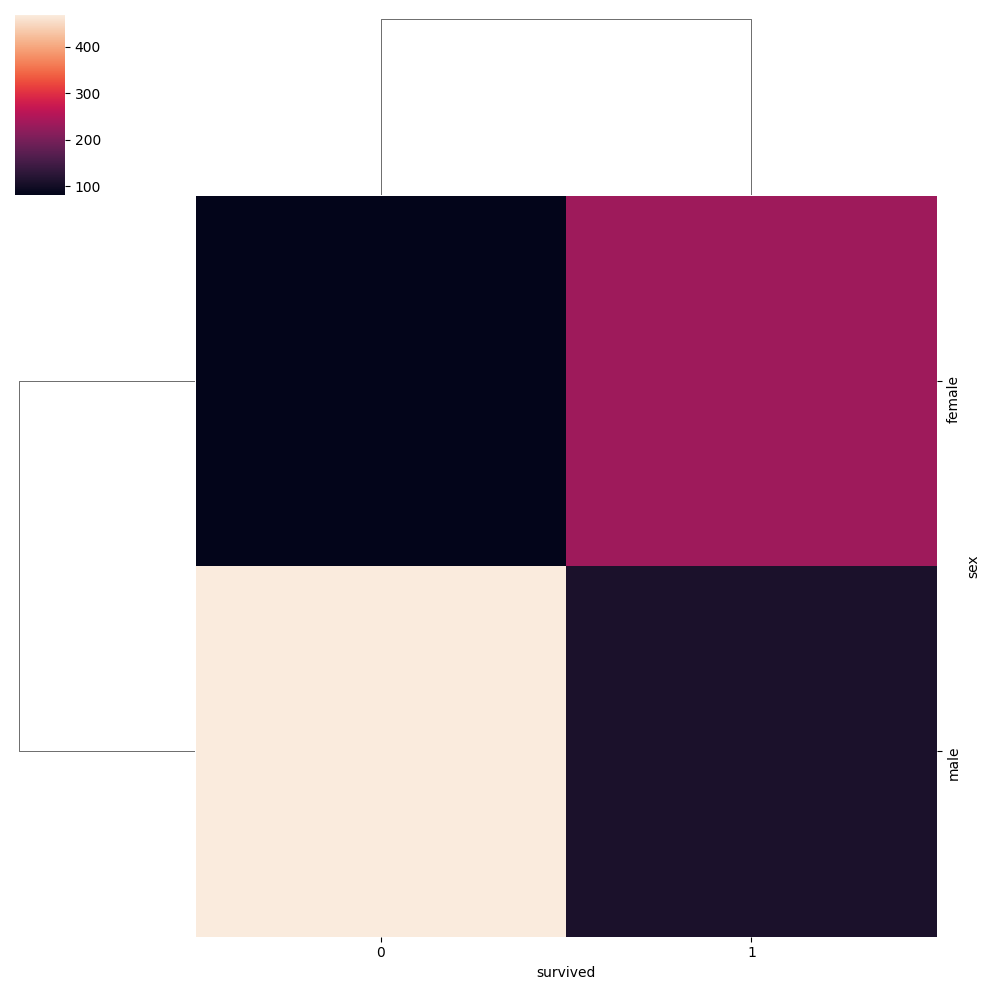

In [137]:
# cluster map: capture the relation ship inside a data:
sns.clustermap(pd.crosstab(titanic['sex'],titanic['survived']))
# see we have tottaly different behaviour between male and female

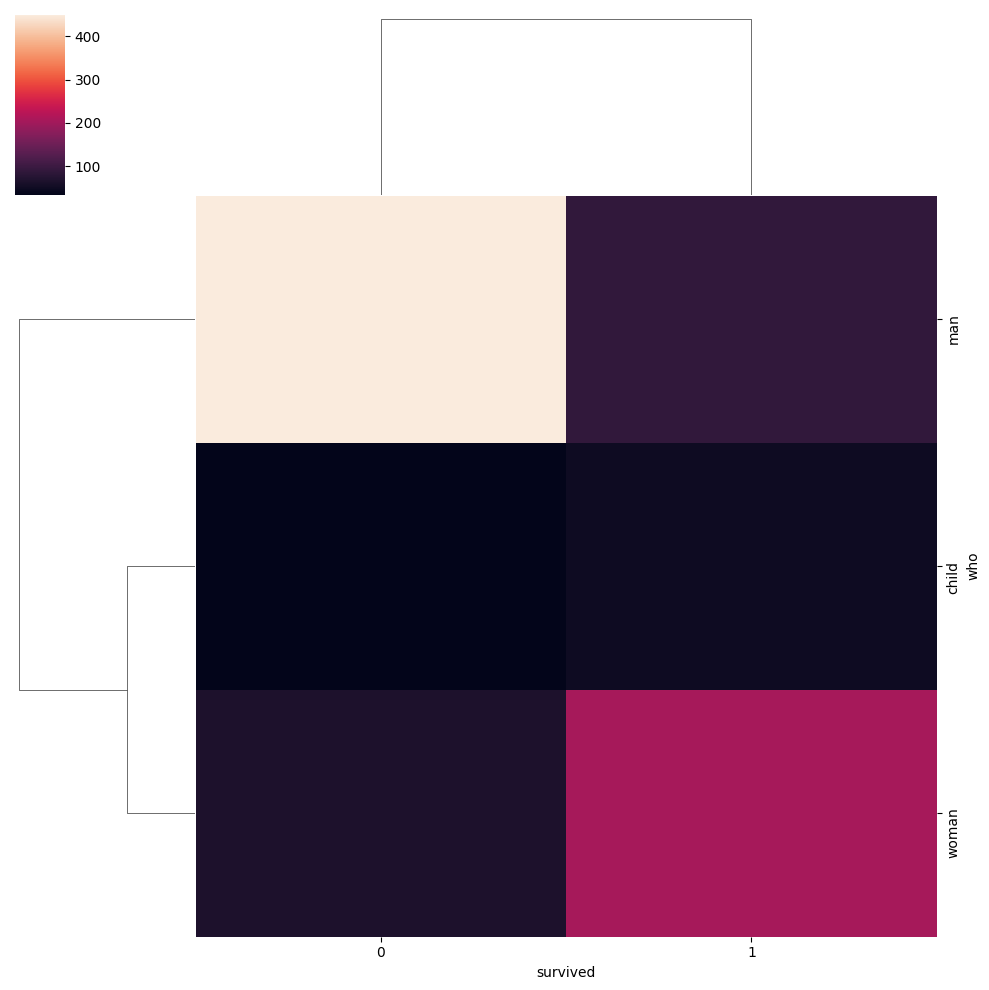

In [139]:
#
sns.clustermap(pd.crosstab(titanic['who'],titanic['survived']))

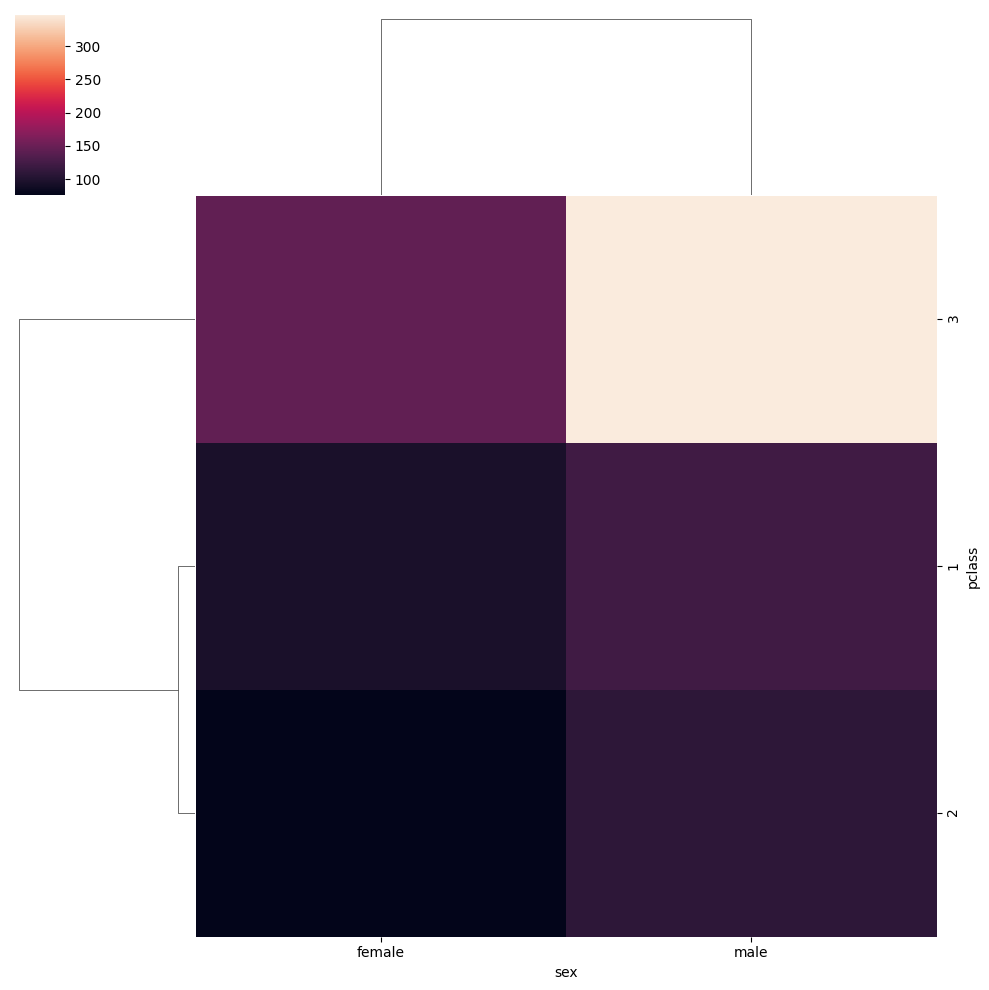

In [142]:
# pclass is the class who get the tickets acording to class standard:
sns.clustermap(pd.crosstab(titanic['pclass'],titanic['sex']))
# here behaviour of 1st class and 2nd class male anf female are quite same
# but behaviour of 3 rd class male and female are different

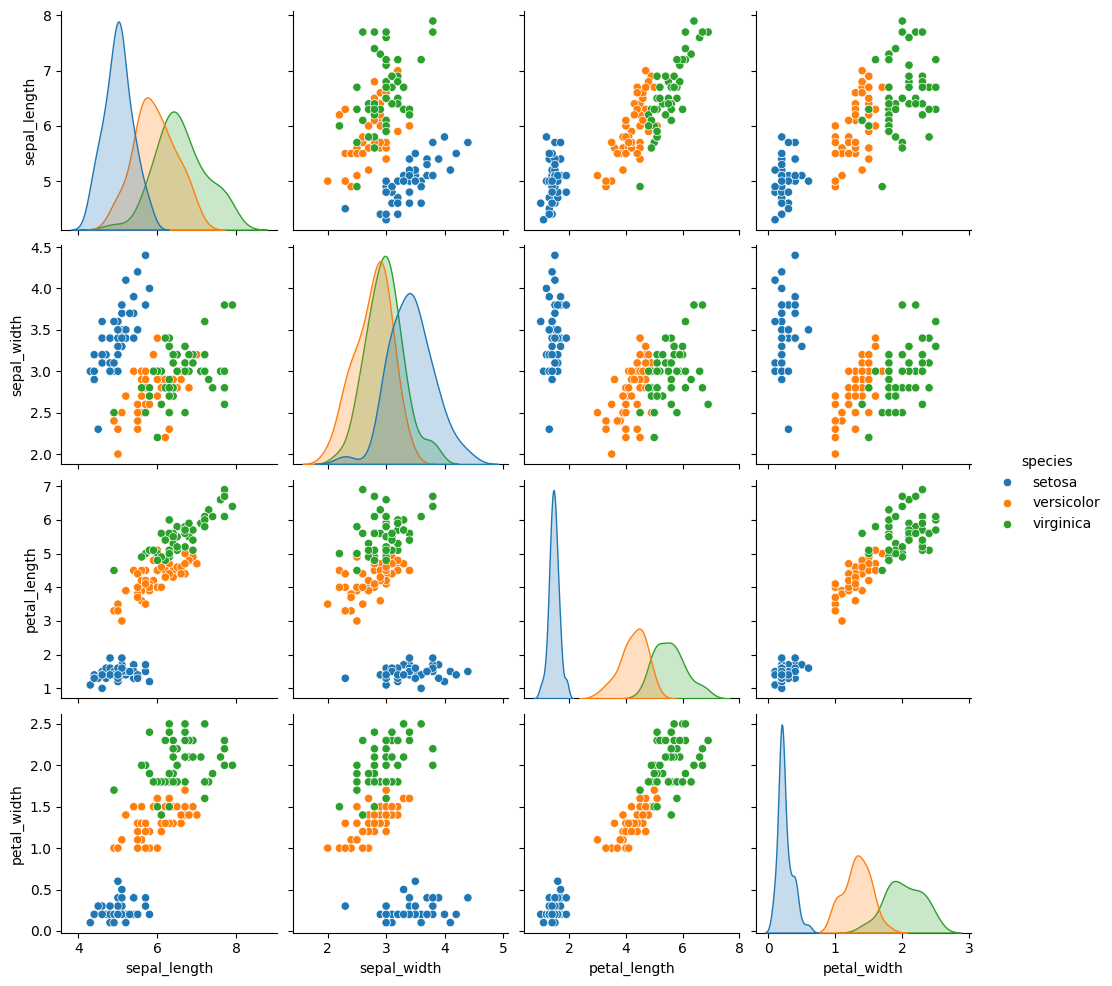

In [144]:
sns.pairplot(data=df,hue='species') # paiplot over iris dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [147]:
df = pd.read_csv("/content/covid_19_clean_complete.csv")
df.head(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe


In [148]:
df.drop(columns=['Province/State'],inplace=True)

In [149]:
df.rename(columns={"Country/Region":"Country","WHO Region":"WHO_Region"},inplace=True)

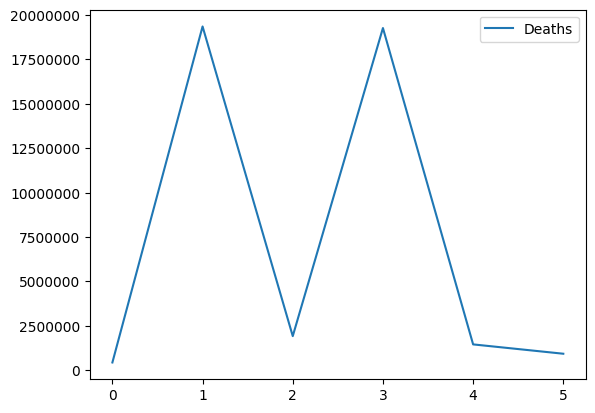

In [163]:
bar = df.groupby("WHO_Region").Deaths.sum().reset_index().plot.line()
bar.get_yaxis().get_major_formatter().set_scientific(False)

In [158]:
new = df.groupby("WHO_Region").Deaths.sum().reset_index()
new

,WHO_Region,Deaths
0,Africa,439978
1,Americas,19359292
2,Eastern Mediterranean,1924029
3,Europe,19271040
4,South-East Asia,1458134
5,Western Pacific,932430


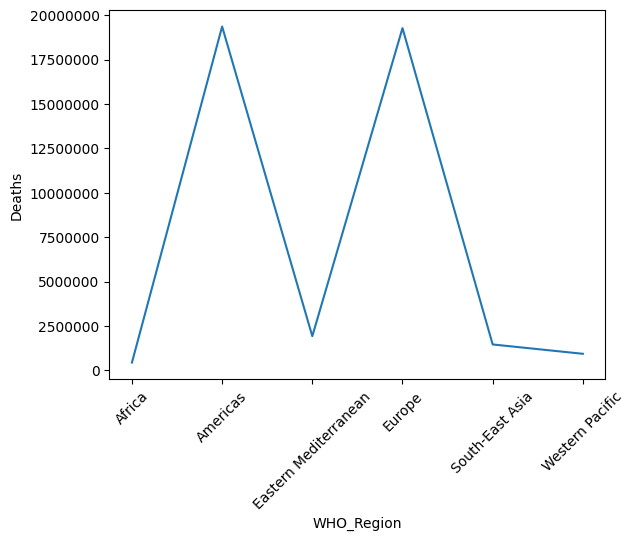

In [164]:
bar = sns.lineplot(data=new,x="WHO_Region",y="Deaths")
plt.xticks(rotation=45)
bar.get_yaxis().get_major_formatter().set_scientific(False)